# Medical data classification using Decision Tree

# Load dataset

In [1]:
from scipy.io import loadmat
#path="/content/drive/MyDrive/UEM/AIML LAB/Classification/"
path=""
data = loadmat(path+'pima_dataset.mat')
X=data['norm_data']
y=data['target']
X.shape

(768, 8)

In [4]:
import numpy as np
import math

from sklearn.model_selection import *

In [6]:
from sklearn import *

In [8]:
from sklearn.metrics import *

# Classification performance measure function

In [11]:
def classification_performance(conf_matrix):
    accureacy=(conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
    recall=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[1][0])
    specificity=(conf_matrix[1][1])/(conf_matrix[0][1]+conf_matrix[1][1])
    precision=(conf_matrix[0][0])/(conf_matrix[0][0]+conf_matrix[0][1])
    F1_score=(2*precision*recall)/(precision+recall)
    GM=math.sqrt(recall*specificity)
    FPR=1-specificity
    return accureacy,recall,specificity,precision,F1_score,GM,FPR

In [25]:
k=10;
kf = KFold(n_splits=10)
acc=np.zeros(k,float)
recall=np.zeros(k,float)
spec=np.zeros(k,float)
precision=np.zeros(k,float)
F1=np.zeros(k,float)
GM=np.zeros(k,float)
FPR=np.zeros(k,float)
iter=0;
for train, test in kf.split(X):
    
    print("Fold:%d" % (iter))
    #print("%s %s" % (train, test))
    X_train=X[train]
    y_train=y[train]
    X_test=X[test]
    y_test=y[test]
    hidden_nodes=X_train.shape[1]
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    conf_matrix=confusion_matrix(y_test, y_pred)
    acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]=classification_performance(conf_matrix)
    print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (acc[iter], recall[iter], spec[iter], precision[iter], F1[iter], GM[iter], FPR[iter]))
    iter=iter+1
print('=======================================AVERAGE OVER K-FOLD===================================')
# print("Accuracy: %0.2f, Recall=%0.2f, specificity=%0.2f, precision=%0.2f, F1=%0.2f, GM=%0.2f, FPR=%0.2f" % (np.mean(acc), recall.mean(), spec.mean(), precision.mean(), F1.mean(), GM.mean(), FPR.mean()))  
print("Accyracy mod :%0.2f" %(np.std(acc)))

Fold:0
Accuracy: 0.60, Recall=0.65, specificity=0.52, precision=0.67, F1=0.66, GM=0.58, FPR=0.48
Fold:1
Accuracy: 0.78, Recall=0.84, specificity=0.62, precision=0.85, F1=0.85, GM=0.72, FPR=0.38
Fold:2
Accuracy: 0.68, Recall=0.72, specificity=0.62, precision=0.67, F1=0.70, GM=0.67, FPR=0.38
Fold:3
Accuracy: 0.64, Recall=0.70, specificity=0.53, precision=0.70, F1=0.70, GM=0.61, FPR=0.47
Fold:4
Accuracy: 0.70, Recall=0.76, specificity=0.58, precision=0.78, F1=0.77, GM=0.66, FPR=0.42
Fold:5
Accuracy: 0.71, Recall=0.76, specificity=0.64, precision=0.79, F1=0.77, GM=0.70, FPR=0.36
Fold:6
Accuracy: 0.74, Recall=0.89, specificity=0.36, precision=0.78, F1=0.83, GM=0.57, FPR=0.64
Fold:7
Accuracy: 0.81, Recall=0.85, specificity=0.71, precision=0.87, F1=0.86, GM=0.78, FPR=0.29
Fold:8
Accuracy: 0.63, Recall=0.73, specificity=0.42, precision=0.73, F1=0.73, GM=0.55, FPR=0.58
Fold:9
Accuracy: 0.68, Recall=0.72, specificity=0.62, precision=0.78, F1=0.75, GM=0.67, FPR=0.38
==============================

In [17]:
conf_matrix

array([[35, 11],
       [14, 16]], dtype=int64)

[Text(0.5464514307228916, 0.9722222222222222, 'x[1] <= 0.721\ngini = 0.451\nsamples = 692\nvalue = [454.0, 238.0]'),
 Text(0.19857555220883535, 0.9166666666666666, 'x[5] <= 0.402\ngini = 0.361\nsamples = 533\nvalue = [407, 126]'),
 Text(0.0642570281124498, 0.8611111111111112, 'x[1] <= 0.626\ngini = 0.075\nsamples = 154\nvalue = [148, 6]'),
 Text(0.0321285140562249, 0.8055555555555556, 'x[5] <= 0.394\ngini = 0.031\nsamples = 127\nvalue = [125, 2]'),
 Text(0.01606425702811245, 0.75, 'x[6] <= 0.255\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.008032128514056224, 0.6944444444444444, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.024096385542168676, 0.6944444444444444, 'x[6] <= 0.268\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.01606425702811245, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0321285140562249, 0.6388888888888888, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.04819277108433735, 0.75, 'x[3] <= 0.217\ngini = 0.219

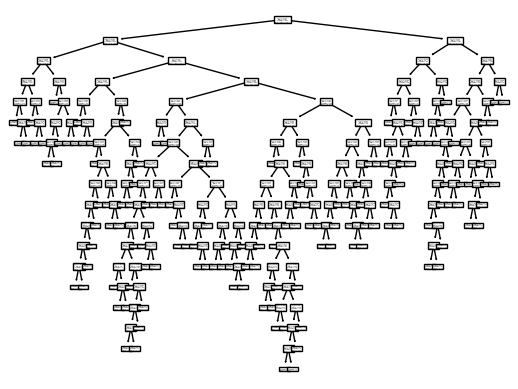

In [17]:
tree.plot_tree(clf)